# First innings score prediction

### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'G:\ipl_first_inngs_score_prediction-regression\ipl.csv')

In [3]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
df.shape

(76014, 15)

# Data Preprocessing

In [5]:
# statistical information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [6]:
# cheking null values
df.isna().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [7]:
# first we will remove unwanted columns
columns_remove= ['mid','venue','batsman','bowler','striker','non-striker']
df.drop(labels=columns_remove,axis=1,inplace=True)

In [8]:
df.head(2)

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222


In [9]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [10]:
# we will take currently played teams only 
current_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                 'Mumbai Indians', 'Kings XI Punjab',
                 'Royal Challengers Bangalore', 'Delhi Daredevils',
                 'Sunrisers Hyderabad']

In [11]:
df=df[(df['bat_team'].isin(current_teams)) & (df['bat_team'].isin(current_teams))]

In [12]:
# Removing the first 5 overs data in every match 
df = df[df['overs']>=5.0]

In [13]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [14]:
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Deccan Chargers' 'Kolkata Knight Riders' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant']


In [15]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [16]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [17]:
df.dtypes

date              datetime64[ns]
bat_team                  object
bowl_team                 object
runs                       int64
wickets                    int64
overs                    float64
runs_last_5                int64
wickets_last_5             int64
total                      int64
dtype: object

In [18]:
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'],drop_first=False)

In [19]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bowl_team_Kings XI Punjab,bowl_team_Kochi Tuskers Kerala,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Pune Warriors,bowl_team_Rajasthan Royals,bowl_team_Rising Pune Supergiant,bowl_team_Rising Pune Supergiants,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
encoded_df.shape

(47680, 29)

In [21]:
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Deccan Chargers',
       'bowl_team_Delhi Daredevils', 'bowl_team_Gujarat Lions',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kochi Tuskers Kerala',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Pune Warriors', 'bowl_team_Rajasthan Royals',
       'bowl_team_Rising Pune Supergiant', 'bowl_team_Rising Pune Supergiants',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [22]:
# Rearranging the columns bcz of we will take independent and dependent variables
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

### This is time series kind of data so we cannot take as randomly

In [23]:
# Splitting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

In [24]:
y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

In [25]:
# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [26]:
X_test.head()

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5
68894,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,5.1,46,1,42,1
68895,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,5.2,50,1,46,1
68896,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,5.3,50,1,44,1
68897,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,5.4,54,1,48,1
68898,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,5.5,58,1,51,1


In [27]:
X_test.shape,X_train.shape

((3859, 21), (43821, 21))

In [28]:
y_test

array([207, 207, 207, ..., 129, 129, 129], dtype=int64)

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Creating Model

# Linear Regression Model

In [75]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

In [76]:
#Model Prediction for testing
y_pred_lr = model_lr.predict(X_test)

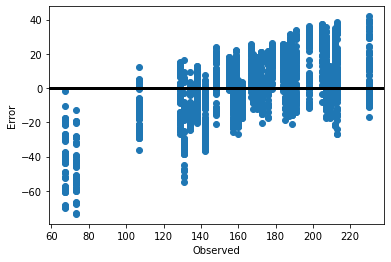

In [77]:
# plot the error difference
error = y_test - y_pred_lr
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

### Model Evaluation

In [78]:
# score and errors 
print('Score:', metrics.r2_score(y_test, y_pred_lr))
print('MAE  :', metrics.mean_absolute_error(y_test, y_pred_lr))
print('MSE  :', metrics.mean_squared_error(y_test, y_pred_lr))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

<IPython.core.display.Javascript object>

Score: 0.7319769159502452


<IPython.core.display.Javascript object>

MAE  : 12.790190775533286


<IPython.core.display.Javascript object>

MSE  : 288.02320170259134


<IPython.core.display.Javascript object>

RMSE : 16.971246321428232


## Ridge Regression

In [79]:
## Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV     #parameter tuning

In [80]:
model_ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
model_ridge=GridSearchCV(model_ridge,parameters,scoring='neg_mean_squared_error',cv=5)  #cv is cross validation technique 
model_ridge.fit(X_train,y_train)

F:\vineethreddy\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.27997e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [81]:
print(model_ridge.best_params_)
print(model_ridge.best_score_)

{'alpha': 1e-10}
-324.9201907374208


In [82]:
y_pred_ridge=model_ridge.predict(X_test)

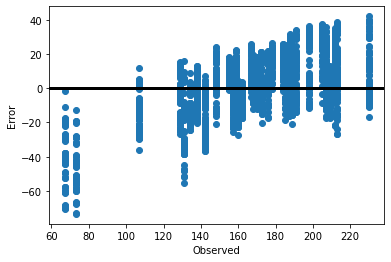

In [83]:
# plot the error difference
error = y_test - y_pred_ridge
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [84]:
# score and errors 
print('Score:', metrics.r2_score(y_test, y_pred_ridge))
print('MAE  :', metrics.mean_absolute_error(y_test, y_pred_ridge))
print('MSE  :', metrics.mean_squared_error(y_test, y_pred_ridge))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))

<IPython.core.display.Javascript object>

Score: 0.7318237172281004


<IPython.core.display.Javascript object>

MAE  : 12.795675330990221


<IPython.core.display.Javascript object>

MSE  : 288.18783224777496


<IPython.core.display.Javascript object>

RMSE : 16.976095907121135


F:\vineethreddy\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

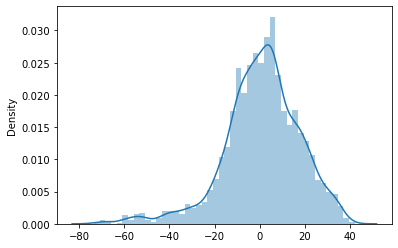

In [85]:
sns.distplot(y_test-y_pred_ridge)

## Lasso Regression

In [86]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [87]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

F:\vineethreddy\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3464778.6209010216, tolerance: 2967.3978263549757
  model = cd_fast.enet_coordinate_descent(
F:\vineethreddy\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3091440.966933984, tolerance: 2990.7372835952874
  model = cd_fast.enet_coordinate_descent(
F:\vineethreddy\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3617505.668054425, tolerance: 3012.5981343241024
  model = cd_fast.enet_coordinate_descent(
F:\vineethreddy\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. Y

{'alpha': 0.01}
-324.73181220586866


In [88]:
y_pred_lasso=lasso_regressor.predict(X_test)

In [89]:
# score and errors 
print('Score:', metrics.r2_score(y_test, y_pred_lasso))
print('MAE  :', metrics.mean_absolute_error(y_test, y_pred_lasso))
print('MSE  :', metrics.mean_squared_error(y_test, y_pred_lasso))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))

<IPython.core.display.Javascript object>

Score: 0.7314910261696902


<IPython.core.display.Javascript object>

MAE  : 12.799514155975329


<IPython.core.display.Javascript object>

MSE  : 288.54534900481417


<IPython.core.display.Javascript object>

RMSE : 16.986622648567142


### Decission Tree Regressor

In [90]:
from sklearn.tree import DecisionTreeRegressor

In [91]:
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [92]:
y_pred_tree = tree.predict(X_test)

In [93]:
# score and errors 
print('Score:', metrics.r2_score(y_test, y_pred_tree))
print('MAE  :', metrics.mean_absolute_error(y_test, y_pred_tree))
print('MSE  :', metrics.mean_squared_error(y_test, y_pred_tree))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_tree)))

<IPython.core.display.Javascript object>

Score: 0.4051488726794161


<IPython.core.display.Javascript object>

MAE  : 18.695516973309147


<IPython.core.display.Javascript object>

MSE  : 639.2394402694998


<IPython.core.display.Javascript object>

RMSE : 25.28318493128387


### Random Forest Regressor

In [95]:
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor,VotingRegressor,StackingRegressor
GradientBoostingRegressor,RandomForestRegressor

(lazy pyforest.LazyImport for 'from sklearn.ensemble import GradientBoostingRegressor',
 sklearn.ensemble._forest.RandomForestRegressor)

In [96]:
ada = AdaBoostRegressor()
ada.fit(X_train,y_train)
pred_ada = ada.predict(X_test)

In [98]:
# score and errors 
print('Score:', metrics.r2_score(y_test, pred_ada))
print('MAE  :', metrics.mean_absolute_error(y_test, pred_ada))
print('MSE  :', metrics.mean_squared_error(y_test, pred_ada))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, pred_ada)))

<IPython.core.display.Javascript object>

Score: 0.5725899473584364


<IPython.core.display.Javascript object>

MAE  : 16.66525468314017


<IPython.core.display.Javascript object>

MSE  : 459.3037657116269


<IPython.core.display.Javascript object>

RMSE : 21.43137339769962


In [100]:
bagging = BaggingRegressor()
bagging.fit(X_train,y_train)
pred_bag = bagging.predict(X_test)

# score and errors 
print('Score:', metrics.r2_score(y_test, pred_bag))
print('MAE  :', metrics.mean_absolute_error(y_test, pred_bag))
print('MSE  :', metrics.mean_squared_error(y_test, pred_bag))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, pred_bag)))

<IPython.core.display.Javascript object>

Score: 0.6499541511159255


<IPython.core.display.Javascript object>

MAE  : 14.565901788027988


<IPython.core.display.Javascript object>

MSE  : 376.16657720264317


<IPython.core.display.Javascript object>

RMSE : 19.395014235690656


In [101]:
etr = ExtraTreesRegressor()
etr.fit(X_train,y_train)
pred_etr = etr.predict(X_test)

# score and errors 
print('Score:', metrics.r2_score(y_test, pred_etr))
print('MAE  :', metrics.mean_absolute_error(y_test, pred_etr))
print('MSE  :', metrics.mean_squared_error(y_test, pred_etr))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, pred_etr)))

<IPython.core.display.Javascript object>

Score: 0.6470637094624048


<IPython.core.display.Javascript object>

MAE  : 14.939495983415394


<IPython.core.display.Javascript object>

MSE  : 379.2727061479658


<IPython.core.display.Javascript object>

RMSE : 19.474925061421054


In [107]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
pred_gbr = gbr.predict(X_test)

# score and errors 
print('Score:', metrics.r2_score(y_test, pred_gbr))
print('MAE  :', metrics.mean_absolute_error(y_test, pred_gbr))
print('MSE  :', metrics.mean_squared_error(y_test, pred_gbr))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, pred_gbr)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Score: 0.7231619278165996


<IPython.core.display.Javascript object>

MAE  : 12.952904372540713


<IPython.core.display.Javascript object>

MSE  : 297.49597198364535


<IPython.core.display.Javascript object>

RMSE : 17.24807154390442


In [108]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)

# score and errors 
print('Score:', metrics.r2_score(y_test, pred_rf))
print('MAE  :', metrics.mean_absolute_error(y_test, pred_rf))
print('MSE  :', metrics.mean_squared_error(y_test, pred_rf))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, pred_rf)))

<IPython.core.display.Javascript object>

Score: 0.6776713698901312


<IPython.core.display.Javascript object>

MAE  : 14.171173527560804


<IPython.core.display.Javascript object>

MSE  : 346.3810752488042


<IPython.core.display.Javascript object>

RMSE : 18.611315784995003


#### Finally The Linear Regression model will be performed better in thesee all Algos so we save the model of Linear Regression

In [109]:
import pickle
# open a file, where you want to store the data
file = open('linear_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(model_lr, file)